In [2]:
#Add new directory to path to import ngs and pserm
import sys
import os
path = os.getcwd()
path_with_ngs_and_pserm = os.path.dirname(path)

sys.path.append(path_with_ngs_and_pserm)

#Imports 
import tqdm
import glob
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from ngs import NGS_round_data, NGS_DMD, common_clones
from pserm import ngs_analysis, generate_clone_set
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib.colors import TwoSlopeNorm
from scipy.stats import spearmanr, pearsonr

#specify font properties for better export into adobe illustrator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Add myriad pro font
fpath = "/Library/Fonts/Myriad Pro Regular.ttf"
aapath = '/Library/Fonts/cour.ttf'

prop = fm.FontProperties(fname=fpath, size = 20)
tickprop = fm.FontProperties(fname = fpath, size = 16)
aaprop = fm.FontProperties(fname = aapath, size = 16)

NGS package imported


# Antibody variant frequency

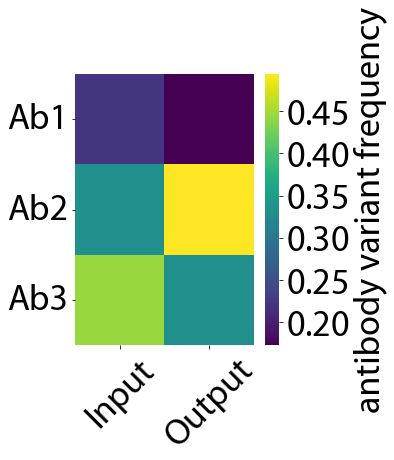

In [39]:
a = np.array([
    [2/9, 1/6],
    [3/9, 3/6],
    [4/9, 2/6]
])
a

fig, ax = plt.subplots(figsize = (4, 5))

sns.heatmap(a, robust = True, ax = ax, cmap = 'viridis', xticklabels = False, rasterized = True)
colorbar = ax.collections[0].colorbar
colorbar.set_label(f'antibody variant frequency', fontproperties = tickprop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)
colorbar.ax.ticklabel_format(axis = 'y', useMathText = True)

ax.set_yticks([0.5, 1.5, 2.5])
ax.set_yticklabels(['Ab1', 'Ab2', 'Ab3'], fontproperties = tickprop, rotation = 0)

ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Input', 'Output'], fontproperties = tickprop, rotation = 45)

plt.savefig('Frequency Matrix.pdf', bbox_inches = 'tight')

plt.show()

In [3]:
p1_wt = 'YRRRGAWY'

p1_muts_no_wt = {
0: ['A', 'D', 'F', 'S', 'V'],
1: ['A', 'E', 'G', 'K', 'T'],
2: ['A', 'E', 'G', 'K', 'T'],
3: ['A', 'E', 'G', 'K', 'T'],
4: ['A', 'D', 'N', 'S', 'T'],
5: ['D', 'F', 'S', 'V', 'Y'],
6: ['L', 'G', 'V', 'S', 'A'],
7: ['A', 'D', 'F', 'S', 'V']
}

p1_r1 = NGS_round_data(
    Round = 3, 
    sequence_type = 'mutations', 
    samples =[
        'Input', 'Ag1_P', 'Ag01_P', 'DA_P', 'PSR_P', 'PSR_N', 
        'Ins_P', 'Ins_N', 'Ova_P', 'Ova_N'],
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_1/Rep_1', 
    wild_type = p1_wt, 
    mutations_dict = p1_muts_no_wt
)

p1_r2 = NGS_round_data(
    Round = 3, 
    sequence_type = 'mutations', 
    samples =[
        'Input', 'Ag1_P', 'Ag01_P', 'DA_P', 'PSR_P', 'PSR_N', 'PSR_NB', 
        'Ins_P', 'Ins_NS', 'Ins_NB', 'Ova_P', 'Ova_N', 'Ova_NB'],
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_1/Rep_2', 
    wild_type = p1_wt, 
    mutations_dict = p1_muts_no_wt
)

p1_clone_set_trimmed_r1 = generate_clone_set(p1_r1, ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N', 'Ins_P'])
p1_clone_set_trimmed_r2 = generate_clone_set(p1_r2, ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N', 'Ins_P'])
p1_clone_set_trimmed = list(set(p1_clone_set_trimmed_r1).union(set(p1_clone_set_trimmed_r2)))

p1_data = ngs_analysis([p1_r1, p1_r2], ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N'], clone_set = p1_clone_set_trimmed)

p1_data.generate_D()


['Mutation_139624.csv', 'Mutation_139625.csv', 'Mutation_139626.csv', 'Mutation_139627.csv', 'Mutation_139628.csv', 'Mutation_139629.csv', 'Mutation_139630.csv', 'Mutation_139631.csv', 'Mutation_139632.csv', 'Mutation_139633.csv']
['Mutation_140403.csv', 'Mutation_140404.csv', 'Mutation_140405.csv', 'Mutation_140406.csv', 'Mutation_140407.csv', 'Mutation_140408.csv', 'Mutation_140409.csv', 'Mutation_140410.csv', 'Mutation_140411.csv', 'Mutation_140412.csv', 'Mutation_140413.csv', 'Mutation_140414.csv', 'Mutation_140415.csv']


100%|██████████| 774931/774931 [00:01<00:00, 554502.77it/s]


In [4]:
for pssm in glob.glob('../Project_PSSMs/Project_1/*.xlsx'):
    p1_data.load_pssm(pssm.split('.xlsx')[0].split('/')[-1], pssm, excel_or_csv = 'excel')

for ppm in glob.glob('../Project_PPMs/Project_1/*.xlsx'):    
    p1_data.load_ppm(ppm.split('.xlsx')[0].split('/')[-1], ppm, excel_or_csv = 'excel')

for sample in p1_data.samples:
    if sample != 'Input':
        p1_data.generate_PSERM(In_sample = 'Input', Out_sample = sample)

In [10]:
p1_data.score_all_clones_mp(method = 'PSERM')

Done in 5.52 minutes


bdat NOT subset; don't know how to subset; dropped
bloc NOT subset; don't know how to subset; dropped


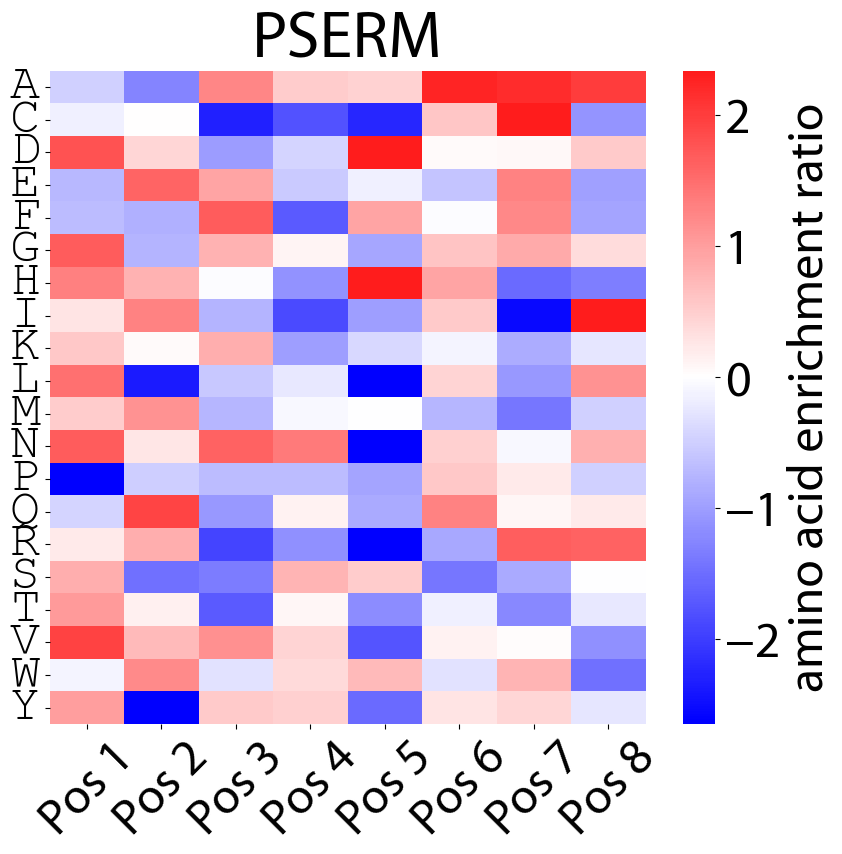

In [23]:
fig, axs = plt.subplots(1, 1, figsize = (7.2*1.2, 7.2*1.2))

prop = fm.FontProperties(fname=fpath, size = 48)
tickprop = fm.FontProperties(fname = fpath, size = 36)
aaprop = fm.FontProperties(fname = aapath, size = 36)

aas = sorted(p1_data.AA_order)
xlabels = list(range(len(p1_data.wt)))

PSERM = np.random.normal(loc=0, scale=1.3, size=(len(aas), len(xlabels)))

sns.heatmap(PSERM, robust = True, cmap = 'bwr', ax = axs, center = 0)

colorbar = axs.collections[0].colorbar
colorbar.set_label(f'amino acid enrichment ratio', fontproperties = tickprop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)

axs.set_xticks([i + 0.5 for i in range(len(xlabels))])
axs.set_xticklabels([f'Pos {i + 1}' for i in range(len(xlabels))], rotation = 45, fontproperties = tickprop)

axs.set_yticks([i + 0.5 for i in range(len(aas))], aas, fontproperties = aaprop, rotation = 0)

axs.set_title('PSERM', fontproperties = prop)

plt.tight_layout()
plt.savefig('PSERM.pdf', bbox_inches = 'tight')
plt.show()

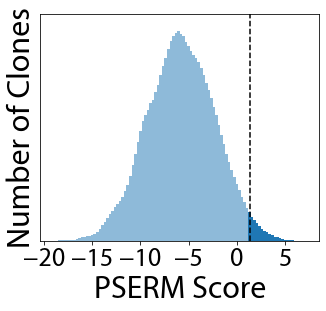

In [29]:
fig, ax = plt.subplots(figsize = (5, 5/1.2))

prop = fm.FontProperties(fname=fpath, size = 32)
tickprop = fm.FontProperties(fname = fpath, size = 26)
aaprop = fm.FontProperties(fname = aapath, size = 26)

top_2_ind = int(0.02 * len(p1_data.scores))
top2_score = p1_data.scores.sort_values('Ag01_P PSERM Score', ascending = False)['Ag01_P PSERM Score'][top_2_ind]

n, bins, p = ax.hist(p1_data.scores['Ag01_P PSERM Score'], bins = 100, alpha = 0.5, edgecolor='None')

#index = np.searchsorted(bins, top5_score)
for i in range(len(p)):
    if bins[i+1] > top2_score:
        p[i].set_fc(plt.get_cmap('tab10')(0))
        p[i].set_alpha(1)

ax.plot([top2_score, top2_score], [0, 40000], '--', color = 'k')
ax.set_xlabel('PSERM Score')

ax.set_ylabel('Number of Clones', fontproperties = prop)
ax.set_xlabel('PSERM Score', fontproperties = prop)

ax.set_yticks([])
ax.set_ylim(0, 40000)
for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)

#plt.tight_layout()
plt.savefig('Score_clones.pdf', transparent = True, bbox_inches = 'tight')

plt.show()

In [15]:
p1_binding = pd.read_excel('../4_and_5_Binding_Correlations_Figure_Cooptimal/p1_binding_with_ngs_scores.xlsx', index_col = 0)

ag_overlap = set(p1_binding.index)
excluded_ag_seqs = set(p1_binding[p1_binding['ANT ER'].isna()].index)
excluded_ag_seqs = excluded_ag_seqs.union(set(p1_binding[p1_binding['ANT Frequency'].isna()].index))
excluded_ag_seqs = excluded_ag_seqs.union(set(p1_binding[p1_binding['ANT PSSM Score'].isna()].index))
excluded_ag_seqs = excluded_ag_seqs.union(set(p1_binding[p1_binding['ANT PSERM Score'].isna()].index))

ag_overlap = list(ag_overlap - excluded_ag_seqs)

ova_overlap = set(p1_binding.index)
excluded_ova_seqs = set(p1_binding[p1_binding['OVA ER'].isna()].index)
excluded_ova_seqs = excluded_ova_seqs.union(set(p1_binding[p1_binding['OVA Frequency'].isna()].index))
excluded_ova_seqs = excluded_ova_seqs.union(set(p1_binding[p1_binding['OVA PSSM Score'].isna()].index))
excluded_ova_seqs = excluded_ova_seqs.union(set(p1_binding[p1_binding['OVA PSERM Score'].isna()].index))

ova_overlap = list(ova_overlap - excluded_ova_seqs)

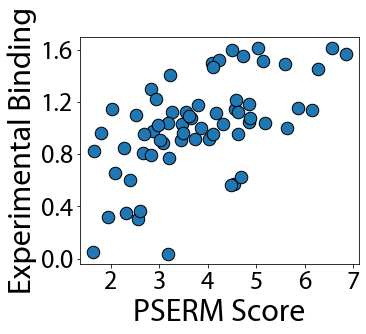

In [28]:
fig, ax = plt.subplots(figsize = (5, 5/1.2))
df = p1_binding[p1_binding['ANT PSERM Score'] > top2_score]
ax.plot(df['ANT PSERM Score'], df['ANT Binding'], '.', markersize = 25, markeredgecolor = 'k')

ax.set_xlabel('PSERM Score', fontproperties = prop)
ax.set_ylabel('Experimental Binding', fontproperties = prop)

ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6])
for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(tickprop)

plt.savefig('Test.pdf', transparent = True, bbox_inches = 'tight')
plt.show()

# Deep sequencing statistics

## Project 1

In [3]:
p1_wt = 'YRRRGAWY'

p1_muts_no_wt = {
0: ['A', 'D', 'F', 'S', 'V'],
1: ['A', 'E', 'G', 'K', 'T'],
2: ['A', 'E', 'G', 'K', 'T'],
3: ['A', 'E', 'G', 'K', 'T'],
4: ['A', 'D', 'N', 'S', 'T'],
5: ['D', 'F', 'S', 'V', 'Y'],
6: ['L', 'G', 'V', 'S', 'A'],
7: ['A', 'D', 'F', 'S', 'V']
}

p1_r1 = NGS_round_data(
    Round = 3, 
    sequence_type = 'mutations', 
    samples =[
        'Input', 'Ag1_P', 'Ag01_P', 'DA_P', 'PSR_P', 'PSR_N', 
        'Ins_P', 'Ins_N', 'Ova_P', 'Ova_N'],
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_1/Rep_1', 
    wild_type = p1_wt, 
    mutations_dict = p1_muts_no_wt
)

p1_r2 = NGS_round_data(
    Round = 3, 
    sequence_type = 'mutations', 
    samples =[
        'Input', 'Ag1_P', 'Ag01_P', 'DA_P', 'PSR_P', 'PSR_N', 'PSR_NB', 
        'Ins_P', 'Ins_NS', 'Ins_NB', 'Ova_P', 'Ova_N', 'Ova_NB'],
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_1/Rep_2', 
    wild_type = p1_wt, 
    mutations_dict = p1_muts_no_wt
)

['Mutation_139624.csv', 'Mutation_139625.csv', 'Mutation_139626.csv', 'Mutation_139627.csv', 'Mutation_139628.csv', 'Mutation_139629.csv', 'Mutation_139630.csv', 'Mutation_139631.csv', 'Mutation_139632.csv', 'Mutation_139633.csv']
['Mutation_140403.csv', 'Mutation_140404.csv', 'Mutation_140405.csv', 'Mutation_140406.csv', 'Mutation_140407.csv', 'Mutation_140408.csv', 'Mutation_140409.csv', 'Mutation_140410.csv', 'Mutation_140411.csv', 'Mutation_140412.csv', 'Mutation_140413.csv', 'Mutation_140414.csv', 'Mutation_140415.csv']


In [32]:
#Compute library size
s = 1
for aalist in p1_r1.mutations_dict.values():
    s *= len(aalist) + 1 # add one because mutations dict doesn't contain WT aa
s

1679616

In [19]:
p1_r1_df = pd.DataFrame.from_dict(p1_r1.sample_counts, orient = 'index', columns = ['Number of reads'])
p1_r1_df['Number of reads'] = [int(r) for r in p1_r1_df['Number of reads']]

number_of_seqs = []
for s, d in p1_r1.data.items():
    number_of_seqs.append(len(d))

p1_r1_df.loc[:, 'Number of unique sequences'] = number_of_seqs
p1_r1_df


,Number of reads,Number of unique sequences
Input,1124801,534622
Ag1_P,852614,68642
Ag01_P,479012,45135
DA_P,962539,208813
PSR_P,1223220,527141
PSR_N,332532,165968
Ins_P,1415351,424459
Ins_N,1132541,208048
Ova_P,784516,375435
Ova_N,1003960,339053


In [18]:
p1_r2_df = pd.DataFrame.from_dict(p1_r2.sample_counts, orient = 'index', columns = ['Number of reads'])
p1_r2_df['Number of reads'] = [int(r) for r in p1_r2_df['Number of reads']]

number_of_seqs = []
for s, d in p1_r2.data.items():
    number_of_seqs.append(len(d))

p1_r2_df.loc[:, 'Number of unique sequences'] = number_of_seqs
p1_r2_df

,Number of reads,Number of unique sequences
Input,422021,275256
Ag1_P,362501,49131
Ag01_P,407575,56602
DA_P,441374,267474
PSR_P,434121,184603
PSR_N,349308,193221
PSR_NB,435241,245476
Ins_P,403309,227189
Ins_NS,446814,232677
Ins_NB,475128,267559


In [24]:
p1_samples = ['Input', 'Ag1_P', 'Ag01_P', 'Ova_P', 'Ova_N', 'PSR_P', 'PSR_N']

p1_df = {}
for s in p1_samples:
    p1_df[s] = [p1_r1_df.loc[s, 'Number of reads'], 
                p1_r1_df.loc[s, 'Number of unique sequences'],
                p1_r2_df.loc[s, 'Number of reads'], 
                p1_r2_df.loc[s, 'Number of unique sequences']
                ]
p1_df = pd.DataFrame.from_dict(p1_df, 
                       columns = ['Number of reads replicate 1', 
                                         'Number of unique sequences replicate 1',
                                         'Number of reads replicate 2', 
                                         'Number of unique sequences replicate 2'],
                        orient = 'index'
                        )
p1_df.to_excel('Project 1 Deep sequencing stats.xlsx')

## Project 2

In [4]:
# Project 2 NGS_round_data setups
p2_wt = 'IDDLYPYWYG'

p2_muts_no_wt = {
    0: ['V'],
    1: ['F', 'K', 'R', 'P', 'Y'],
    2: ['T', 'H', 'K', 'N', 'Y'],
    3: ['R', 'S', 'G'],
    4: ['K'],
    5: ['R', 'G'],
    6: ['K', 'R', 'D', 'E', 'H'],
    7: ['K', 'A', 'D', 'E', 'H'],
    8: ['S', 'Q', 'D', 'E'],
    9: ['A', 'S', 'T', 'K']
}

p2_r1 = NGS_round_data(
    Round = 1, 
    sequence_type = 'mutations', 
    samples = ['Input', 'AgP', 'AgN', 'QDP', 'QDN', 'EP', 'EN'], 
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_2/Rep_1/VH/', 
    wild_type = p2_wt,
    mutations_dict = p2_muts_no_wt
)

p2_r2 = NGS_round_data(
    Round = 1, 
    sequence_type = 'mutations', 
    samples = ['Input', 'AgP', 'AgN', 'QDP', 'QDN', 'EP', 'EN'], 
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_2/Rep_2/VH/', 
    wild_type = p2_wt,
    mutations_dict = p2_muts_no_wt
)

['Mutation_1001.csv', 'Mutation_1002.csv', 'Mutation_1003.csv', 'Mutation_1004.csv', 'Mutation_1005.csv', 'Mutation_1006.csv', 'Mutation_1007.csv']
['Mutation_1001.csv', 'Mutation_1002.csv', 'Mutation_1003.csv', 'Mutation_1004.csv', 'Mutation_1005.csv', 'Mutation_1006.csv', 'Mutation_1007.csv']


In [33]:
#Compute library size
s = 1
for aalist in p2_r1.mutations_dict.values():
    s *= len(aalist) + 1 # add one because mutations dict doesn't contain WT aa
s

1555200

In [17]:
p2_r1_df = pd.DataFrame.from_dict(p2_r1.sample_counts, orient = 'index', columns = ['Number of reads'])
p2_r1_df['Number of reads'] = [int(r) for r in p2_r1_df['Number of reads']]

number_of_seqs = []
for s, d in p2_r1.data.items():
    number_of_seqs.append(len(d))

p2_r1_df.loc[:, 'Number of unique sequences'] = number_of_seqs
p2_r1_df

,Number of reads,Number of unique sequences
Input,1517232,842264
AgP,2018188,192535
AgN,2154312,1002697
QDP,1980461,813486
QDN,2093513,447737
EP,608639,195398
EN,577740,307720


In [16]:
p2_r2_df = pd.DataFrame.from_dict(p2_r2.sample_counts, orient = 'index', columns = ['Number of reads'])
p2_r2_df['Number of reads'] = [int(r) for r in p2_r2_df['Number of reads']]

number_of_seqs = []
for s, d in p2_r2.data.items():
    number_of_seqs.append(len(d))

p2_r2_df.loc[:, 'Number of unique sequences'] = number_of_seqs
p2_r2_df

,Number of reads,Number of unique sequences
Input,1289726,806200
AgP,1744902,203482
AgN,1386191,733310
QDP,1473517,686594
QDN,1640062,361305
EP,488645,139865
EN,499735,271566


In [26]:
p2_samples = ['Input', 'AgP', 'AgN', 'QDP', 'QDN', 'EP', 'EN']

p2_df = {}
for s in p2_samples:
    p2_df[s] = [p2_r1_df.loc[s, 'Number of reads'], 
                p2_r1_df.loc[s, 'Number of unique sequences'],
                p2_r2_df.loc[s, 'Number of reads'], 
                p2_r2_df.loc[s, 'Number of unique sequences']
                ]
p2_df = pd.DataFrame.from_dict(p2_df, 
                       columns = ['Number of reads replicate 1', 
                                         'Number of unique sequences replicate 1',
                                         'Number of reads replicate 2', 
                                         'Number of unique sequences replicate 2'],
                        orient = 'index'
                        )
p2_df.to_excel('Project 2 Deep sequencing stats.xlsx')

## Project 3

In [5]:
#Project 3 was initially planned to utilize a different type of analysis and the data is organized into a different class
#however this is essentially a superficial change.

#Project 3 WT
p3_wt = 'SASFYFDTYI'

#Allowed mutations with NNK is everything
p3_muts_no_wt = {
0: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'T', 'V', 'W', 'Y'], #S
1: ['C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], #A
2: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'T', 'V', 'W', 'Y'], #S
3: ['A', 'C', 'D', 'E', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], #F
4: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W'], #Y
5: ['A', 'C', 'D', 'E', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], #F
6: ['A', 'C', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], #D
7: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'V', 'W', 'Y'], #T
8: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W'], #Y
9: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], #I 
}

#DMD data objects
p3_r1 = NGS_DMD(
    sequence_type = 'mutations', samples = ['R2', 'R3', 'R5', 'R6', 'R7'],
    path = '../Input_Datasets/Project_3/Rep_1/', wild_type = p3_wt, mutations_dict = p3_muts_no_wt
)

p3_r2 = NGS_DMD(
    sequence_type = 'mutations', samples = ['R2', 'R3', 'R5', 'R6', 'R7'],
    path = '../Input_Datasets/Project_3/Rep_2/', wild_type = p3_wt, mutations_dict = p3_muts_no_wt
)

['Mutation_1001.csv', 'Mutation_1003.csv', 'Mutation_1005.csv', 'Mutation_1007.csv', 'Mutation_1009.csv']
['Mutation_1001.csv', 'Mutation_1003.csv', 'Mutation_1005.csv', 'Mutation_1007.csv', 'Mutation_1009.csv']


In [34]:
#Compute library size
s = 1
for aalist in p3_r1.mutations_dict.values():
    s *= len(aalist) + 1 # add one because mutations dict doesn't contain WT aa
s

10240000000000

In [20]:
p3_r1_df = pd.DataFrame.from_dict(p3_r1.sample_counts, orient = 'index', columns = ['Number of reads'])
p3_r1_df['Number of reads'] = [int(r) for r in p3_r1_df['Number of reads']]

number_of_seqs = []
for s, d in p3_r1.data.items():
    number_of_seqs.append(len(d))

p3_r1_df.loc[:, 'Number of unique sequences'] = number_of_seqs
p3_r1_df

,Number of reads,Number of unique sequences
R2,808243,17643
R3,883327,5920
R5,965836,1697
R6,936163,1497
R7,968311,1590


In [21]:
p3_r2_df = pd.DataFrame.from_dict(p3_r2.sample_counts, orient = 'index', columns = ['Number of reads'])
p3_r2_df['Number of reads'] = [int(r) for r in p3_r2_df['Number of reads']]

number_of_seqs = []
for s, d in p3_r2.data.items():
    number_of_seqs.append(len(d))

p3_r2_df.loc[:, 'Number of unique sequences'] = number_of_seqs
p3_r2_df

,Number of reads,Number of unique sequences
R2,1066991,16760
R3,1237003,6885
R5,1014754,2084
R6,1124647,1762
R7,992698,1672


In [28]:
p3_samples = ['R2', 'R3', 'R5', 'R6', 'R7']

p3_df = {}
for s in p3_samples:
    p3_df[s] = [p3_r1_df.loc[s, 'Number of reads'], 
                p3_r1_df.loc[s, 'Number of unique sequences'],
                p3_r2_df.loc[s, 'Number of reads'], 
                p3_r2_df.loc[s, 'Number of unique sequences']
                ]
p3_df = pd.DataFrame.from_dict(p3_df, 
                       columns = ['Number of reads replicate 1', 
                                         'Number of unique sequences replicate 1',
                                         'Number of reads replicate 2', 
                                         'Number of unique sequences replicate 2'],
                        orient = 'index'
                        )
p3_df.to_excel('Project 3 Deep sequencing stats.xlsx')